# Analysis of Presidential Speeches

### Imports and Data collection

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [11]:
ts_raw = pd.read_csv('presidential_speeches.csv')
faq_df_raw = pd.read_csv('whitehouse_faq.csv')
bios_df_raw = pd.read_csv('whitehouse_bios.csv')

In [12]:
ts_raw

,title,president,transcript,source,source_type
0,"September 24, 2024: Address before the 79th Un...",Joe Biden Presidency,"THE PRESIDENT: My fellow leaders, today is the...",https://millercenter.org/the-presidency/presid...,speech
1,"July 24, 2024: Statement to the American People",Joe Biden Presidency,"THE PRESIDENT: My fellow Americans, I’m speaki...",https://millercenter.org/the-presidency/presid...,speech
2,"July 14, 2024: Remarks after the Attempted Ass...",Joe Biden Presidency,"THE PRESIDENT: My fellow Americans, I want to ...",https://millercenter.org/the-presidency/presid...,speech
3,"May 31, 2024: Remarks on the Middle East",Joe Biden Presidency,"THE PRESIDENT: Hello, folks. (The President ch...",https://millercenter.org/the-presidency/presid...,speech
4,"March 7, 2024: State of Union Address",Joe Biden Presidency,"Good evening. Good evening. If I were smart, I...",https://millercenter.org/the-presidency/presid...,speech
...,...,...,...,...,...
1048,"December 29, 1790: Talk to the Chiefs and Coun...",George Washington Presidency,"I the President of the United States, by my ow...",https://millercenter.org/the-presidency/presid...,speech
1049,"December 8, 1790: Second Annual Message to Con...",George Washington Presidency,Fellow citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...,speech
1050,"January 8, 1790: First Annual Message to Congress",George Washington Presidency,Fellow Citizens of the Senate and House of Rep...,https://millercenter.org/the-presidency/presid...,speech
1051,"October 3, 1789: Thanksgiving Proclamation",George Washington Presidency,Whereas it is the duty of all Nations to ackno...,https://millercenter.org/the-presidency/presid...,speech


In [13]:
faq_df_raw

,question,answer,source,source_type
0,Has every president worked in the Oval Office?,No! The Oval Office has been the primary presi...,https://www.whitehousehistory.org/questions/ha...,faq
1,How did the White House get its name?,There is a popular misconception that the Whit...,https://www.whitehousehistory.org/questions/ho...,faq
2,What is the Resolute Desk?,TheResoluteDesk is a double pedestal partners’...,https://www.whitehousehistory.org/questions/wh...,faq
3,Who saved the Gilbert Stuart painting of Georg...,"Completed in 1797, Gilbert Stuart’s painting o...",https://www.whitehousehistory.org/questions/ho...,faq
4,Has the White House ever been renovated or cha...,"Yes, many, many times! Today there is a marker...",https://www.whitehousehistory.org/questions/ha...,faq
5,How was the location of the White House selected?,"Located along the banks of the Potomac River, ...",https://www.whitehousehistory.org/questions/ho...,faq
6,Did President Abraham Lincoln actually sleep i...,President Abraham Lincolndid not sleep in the ...,https://www.whitehousehistory.org/questions/di...,faq
7,Have any presidents or first ladies died at th...,Two presidents and three first ladies have die...,https://www.whitehousehistory.org/questions/wh...,faq
8,How many weddings have been held at the White ...,There have been nineteen documented weddings h...,https://www.whitehousehistory.org/questions/ho...,faq
9,When did the White House host its first Easter...,The first annual White House Easter Egg Roll w...,https://www.whitehousehistory.org/questions/wh...,faq


In [14]:
bios_df_raw

,name,bio,source,source_type
0,Abigail Adams,"Abigail Smith was born in Weymouth, Massachuse...",https://www.whitehousehistory.org/bios/abigail...,bio
1,Abigail Powers Fillmore,"Abigail Powers was born in Saratoga County, Ne...",https://www.whitehousehistory.org/bios/abigail...,bio
2,Abraham Lincoln,Abraham Lincoln warned the South in his first ...,https://www.whitehousehistory.org/bios/abraham...,bio
3,Andrew Jackson,"Andrew Jackson was born on March 15, 1767 near...",https://www.whitehousehistory.org/bios/andrew-...,bio
4,Andrew Johnson,"Andrew Johnson was born on December 29, 1808 i...",https://www.whitehousehistory.org/bios/andrew-...,bio
...,...,...,...,...
98,William McKinley,"At the 1896 Republican convention, in time of ...",https://www.whitehousehistory.org/bios/william...,bio
99,Woodrow Wilson,"Like Theodore Roosevelt before him, Woodrow Wi...",https://www.whitehousehistory.org/bios/woodrow...,bio
100,Zachary Taylor,"Zachary Taylor was born on November 24, 1784 i...",https://www.whitehousehistory.org/bios/zachary...,bio
101,Woodrow Wilson,"Like Theodore Roosevelt before him, Woodrow Wi...",https://www.whitehousehistory.org/bios/woodrow...,bio


In [15]:
ts = ts_raw.copy(deep=True)
faq_df = faq_df_raw.copy(deep=True)
bios_df = bios_df_raw.copy(deep=True)


### Perform initial cleaning of President names

In [16]:
def clean_president_name(president_label):
    # Remove everything after "Presidency"
    return re.sub(r'\s*Presidency.*$', '', president_label)

# Apply the cleaning function to the president column
ts['president'] = ts['president'].apply(clean_president_name)

In [17]:
len(ts['president'].unique())

45

### Get rid of lingering HTML tags & White Space from Speeches

In [18]:
def clean_transcript(transcript: str):
    """
    
    :param transcript: 
    :return: 
    """
    if pd.isna(transcript):
        return transcript
    # Replace NBSP in all caps with a new line
    cleaned_transcript = re.sub(r'\sNBSP\s', '\n', str(transcript))
    
    # Ensure extra whitespaces are removed
    cleaned_transcript = re.sub(r'\s+', ' ', cleaned_transcript).strip()
    
    return cleaned_transcript
    

In [19]:
ts['transcript'] = ts['transcript'].apply(lambda x: clean_transcript(x))

In [20]:
print(ts['transcript'][1018])

TO BROTHER HANDSOME LAKE: I have received the message in writing which you sent me through Captain Irvine, our confidential agent, placed near you for the purpose of communicating and transacting between us, whatever may be useful for both nations. I am happy to learn you have been so far favored by the Divine spirit as to be made sensible of those things which are for your good and that of your people, and of those which are hurtful to you; and particularly that you and they see the ruinous effects which the abuse of spirituous liquors have produced upon them. It has weakened their bodies, enervated their minds, exposed them to hunger, cold, nakedness, and poverty, kept them in perpetual broils, and reduced their population. I do not wonder then, brother, at your censures, not only on your own people, who have voluntarily gone into these fatal habits, but on all the nations of white people who have supplied their calls for this article. But these nations have done to you only what the

### Begin EDA

In [21]:
def calculate_average_sentence_length(text: str) -> float:
    """
    Calculate the average length of sentences in the given text.

    Args:
        text (str): The input text containing one or more sentences.

    Returns:
        float: The average length of sentences in the text.
    """
    sentences = re.split(r'[.!?]', text)

    # Filter out empty strings from the sentences list
    sentences = [s.strip() for s in sentences if s.strip()]

    # Calculate the total number of words and the number of sentences
    total_words = sum(len(sentence.split()) for sentence in sentences)
    num_sentences = len(sentences)

    
    if num_sentences == 0:
        return 0
    return total_words / num_sentences

In [22]:
def calculate_average_word_length(text: str) -> float:
    """
    Calculate the average length of words in the given text.

    Args:
        text (str): The input text containing words.

    Returns:
        float: The average length of words in the text.
    """
    words = text.split()  
    word_lengths = [len(word) for word in words]  
    
    if len(words) == 0:  
        return 0
    return sum(word_lengths) / len(words)  

In [23]:
# Calculate the length of each speech
ts['speech_length'] = ts['transcript'].apply(lambda x: len(x.split()))
ts['sentence_length'] = ts['transcript'].apply(calculate_average_sentence_length)
ts['average_word_length'] = ts['transcript'].apply(calculate_average_word_length)

# Calculate the length of each answer
faq_df['answer_length'] = faq_df['answer'].apply(lambda x: len(x.split()))
faq_df['sentence_length'] = faq_df['answer'].apply(calculate_average_sentence_length)
faq_df['average_word_length'] = faq_df['answer'].apply(calculate_average_word_length)

# Calculate the length of each bio
bios_df['bio_length'] = bios_df['bio'].apply(lambda x: len(x.split()))
bios_df['sentence_length'] = bios_df['bio'].apply(calculate_average_sentence_length)
bios_df['average_word_length'] = bios_df['bio'].apply(calculate_average_word_length)

In [24]:
# EDA: Number of speeches given by each president
speeches_count = ts['president'].value_counts().reset_index()
speeches_count.columns = ['president', 'number_of_speeches']

# EDA: Average length of speeches by each president
avg_speech_length = ts.groupby('president')['speech_length'].mean().reset_index()
avg_speech_length.columns = ['president', 'average_speech_length']

In [25]:
bios_df['sentence_length'].describe()

count    103.000000
mean      16.983540
std        2.443927
min       10.677419
25%       15.520301
50%       16.961538
75%       18.256579
max       24.238095
Name: sentence_length, dtype: float64

In [26]:
bios_df['average_word_length'].describe()

count    103.000000
mean       5.269285
std        0.197904
min        4.670520
25%        5.151522
50%        5.302267
75%        5.394336
max        5.720472
Name: average_word_length, dtype: float64

In [69]:
faq_df['sentence_length'].describe()

count    12.000000
mean     17.739655
std       3.692250
min      10.904762
25%      15.775862
50%      18.433333
75%      20.213235
max      22.600000
Name: sentence_length, dtype: float64

In [71]:
faq_df['average_word_length'].describe()

count    12.000000
mean      5.364958
std       0.294921
min       4.818681
25%       5.242850
50%       5.376957
75%       5.592345
max       5.767742
Name: average_word_length, dtype: float64

In [23]:
summary_stats = ts['speech_length'].describe()

In [24]:
print(summary_stats)

count     1053.000000
mean      3957.586895
std       4165.853517
min        135.000000
25%       1174.000000
50%       2698.000000
75%       4869.000000
max      32994.000000
Name: speech_length, dtype: float64


In [25]:
sentence_length = ts['average_sentence_length'].describe()
sentence_length_by_pres = ts.groupby('president')['average_sentence_length'].describe()

In [26]:
print(sentence_length)

count    1053.000000
mean       28.320392
std        19.782367
min         7.904762
25%        18.282178
50%        23.074074
75%        33.881057
max       382.000000
Name: average_sentence_length, dtype: float64


In [27]:
print(sentence_length_by_pres)

                       count       mean        std        min        25%  \
president                                                                  
Abraham Lincoln         15.0  25.784552   6.372744  16.777778  22.756072   
Andrew Jackson          26.0  48.548321  21.800714  30.551724  39.196250   
Andrew Johnson          31.0  46.534498  34.643829  17.529412  30.853302   
Barack Obama            51.0  17.745957   3.519240  11.333333  14.935877   
Benjamin Harrison       23.0  32.735006  11.544417  15.947368  27.932734   
Bill Clinton            39.0  19.446342   2.570869  14.769912  18.305920   
Calvin Coolidge         12.0  21.630505   2.181222  18.214674  19.564282   
Chester A. Arthur       11.0  30.087999   4.092133  23.627841  27.817757   
Donald Trump            43.0  13.526729   3.002642   7.904762  11.166107   
Dwight D. Eisenhower    15.0  20.535734   2.197229  16.865979  18.874471   
Franklin D. Roosevelt   49.0  22.635403   2.827775  17.375000  21.100000   
Franklin Pie

In [28]:
word_length = ts['average_word_length'].describe()
word_length_by_pres = ts.groupby('president')['average_word_length'].describe()

In [29]:
print(word_length)
print(word_length_by_pres)

count    1053.000000
mean        4.849525
std         0.221616
min         3.951807
25%         4.710199
50%         4.852941
75%         4.995303
max         5.698276
Name: average_word_length, dtype: float64
                       count      mean       std       min       25%  \
president                                                              
Abraham Lincoln         15.0  4.780508  0.223605  4.324503  4.642847   
Andrew Jackson          26.0  4.913300  0.077619  4.733974  4.865337   
Andrew Johnson          31.0  4.992883  0.217970  4.638760  4.843657   
Barack Obama            51.0  4.698298  0.110154  4.421899  4.630786   
Benjamin Harrison       23.0  4.907916  0.183926  4.606796  4.735967   
Bill Clinton            39.0  4.641257  0.144610  4.211623  4.583993   
Calvin Coolidge         12.0  5.053204  0.131901  4.880299  4.932248   
Chester A. Arthur       11.0  5.030018  0.190603  4.674959  4.928288   
Donald Trump            43.0  4.754345  0.242149  3.951807  4.636812  

In [72]:
print(faq_df['sentence_length'].describe())

count    12.000000
mean     17.739655
std       3.692250
min      10.904762
25%      15.775862
50%      18.433333
75%      20.213235
max      22.600000
Name: sentence_length, dtype: float64


In [73]:
print(faq_df['average_word_length'].describe())

count    12.000000
mean      5.364958
std       0.294921
min       4.818681
25%       5.242850
50%       5.376957
75%       5.592345
max       5.767742
Name: average_word_length, dtype: float64


### Plotting

/tmp/ipykernel_468560/454063095.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='number_of_speeches', y='president', data=speeches_count, palette='viridis')


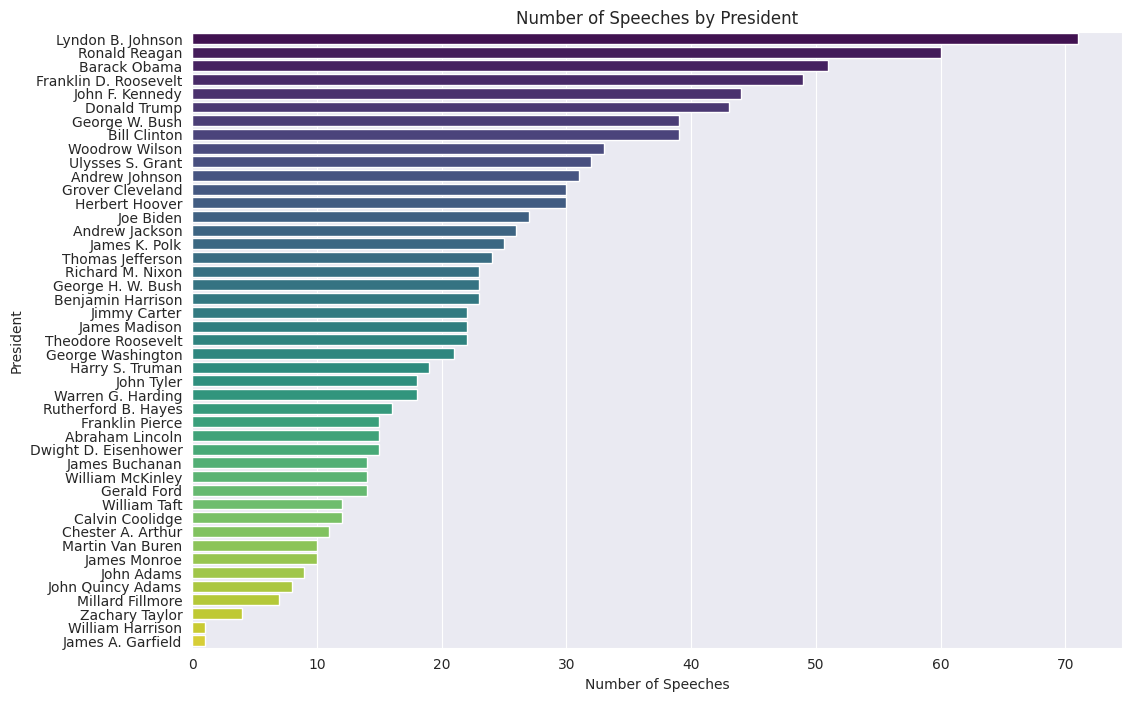

In [30]:
# Plot: Number of speeches by president
plt.figure(figsize=(12, 8))
sns.barplot(x='number_of_speeches', y='president', data=speeches_count, palette='viridis')
plt.title('Number of Speeches by President')
plt.xlabel('Number of Speeches')
plt.ylabel('President')
plt.show()

/tmp/ipykernel_468560/4016795522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='average_speech_length', y='president', data=avg_speech_length, palette='viridis')


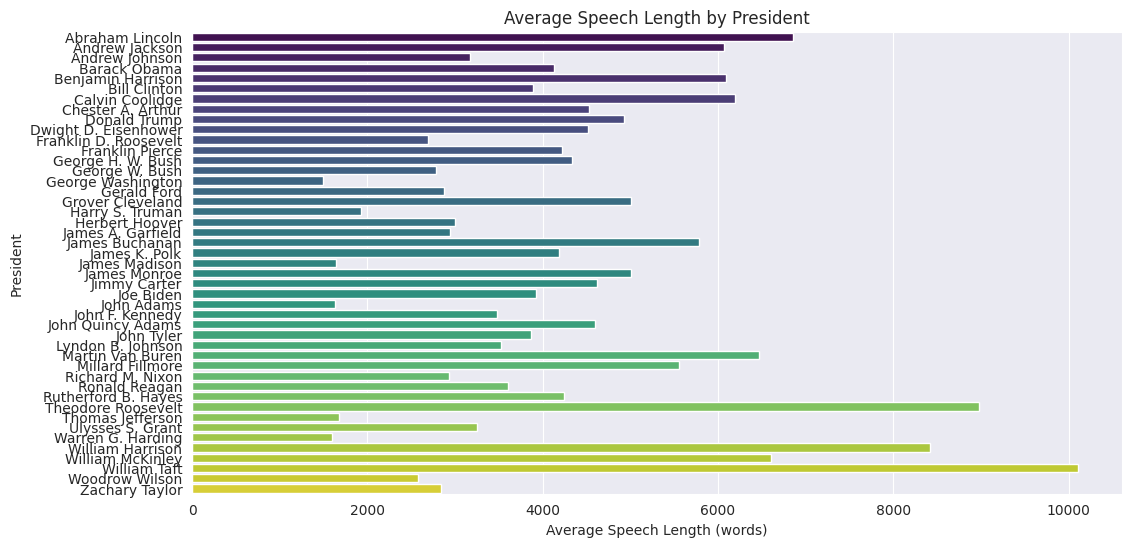

In [31]:
# Plot: Average speech length by president
plt.figure(figsize=(12, 6))
sns.barplot(x='average_speech_length', y='president', data=avg_speech_length, palette='viridis')
plt.title('Average Speech Length by President')
plt.xlabel('Average Speech Length (words)')
plt.ylabel('President')
plt.show()

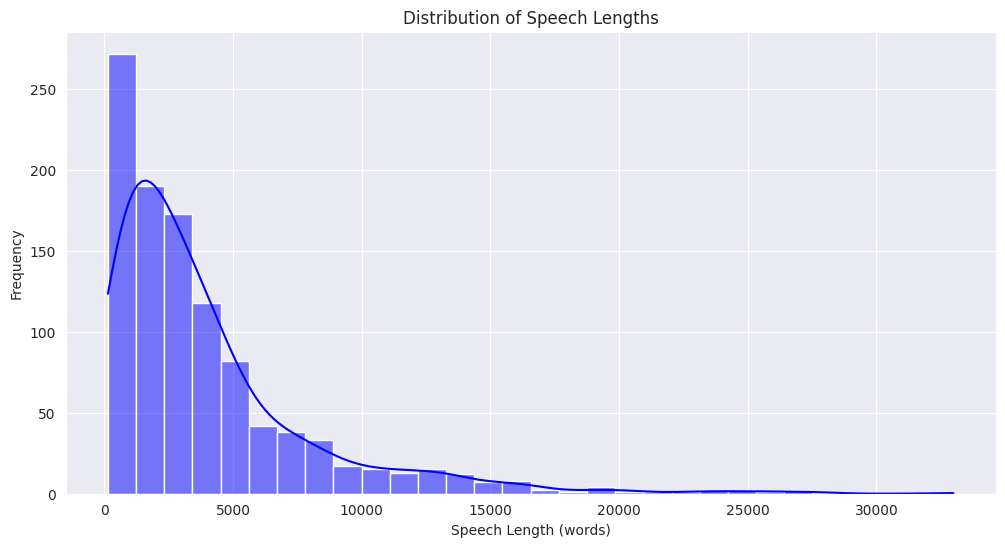

In [32]:
# Plot: Distribution of speech lengths
plt.figure(figsize=(12, 6))
sns.histplot(ts['speech_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Speech Lengths')
plt.xlabel('Speech Length (words)')
plt.ylabel('Frequency')
plt.show()

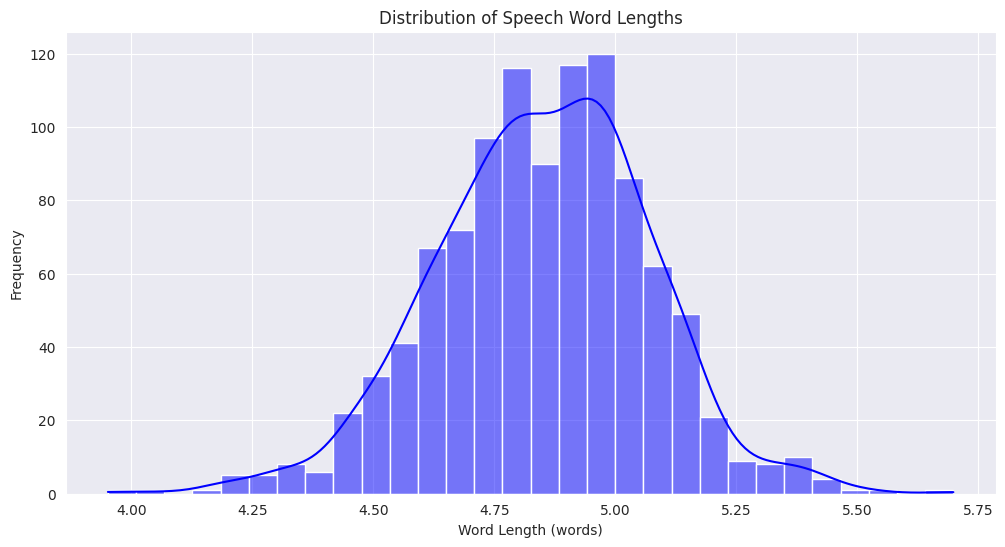

In [74]:
plt.figure(figsize=(12, 6))
sns.histplot(ts['average_word_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Speech Word Lengths')
plt.xlabel('Word Length (words)')
plt.ylabel('Frequency')
plt.show()

### Save the cleaned data and EDA results to CSV files

In [33]:
ts.to_csv('cleaned_presidential_speeches.csv', index=False)
speeches_count.to_csv('presidential_speeches_count.csv', index=False)
avg_speech_length.to_csv('presidential_speeches_avg_length.csv', index=False)

In [34]:
faq_df

,question,answer,source,source_type
0,Has every president worked in the Oval Office?,No! The Oval Office has been the primary presi...,https://www.whitehousehistory.org/questions/ha...,faq
1,How did the White House get its name?,There is a popular misconception that the Whit...,https://www.whitehousehistory.org/questions/ho...,faq
2,What is the Resolute Desk?,TheResoluteDesk is a double pedestal partners’...,https://www.whitehousehistory.org/questions/wh...,faq
3,Who saved the Gilbert Stuart painting of Georg...,"Completed in 1797, Gilbert Stuart’s painting o...",https://www.whitehousehistory.org/questions/ho...,faq
4,Has the White House ever been renovated or cha...,"Yes, many, many times! Today there is a marker...",https://www.whitehousehistory.org/questions/ha...,faq
5,How was the location of the White House selected?,"Located along the banks of the Potomac River, ...",https://www.whitehousehistory.org/questions/ho...,faq
6,Did President Abraham Lincoln actually sleep i...,President Abraham Lincolndid not sleep in the ...,https://www.whitehousehistory.org/questions/di...,faq
7,Have any presidents or first ladies died at th...,Two presidents and three first ladies have die...,https://www.whitehousehistory.org/questions/wh...,faq
8,How many weddings have been held at the White ...,There have been nineteen documented weddings h...,https://www.whitehousehistory.org/questions/ho...,faq
9,When did the White House host its first Easter...,The first annual White House Easter Egg Roll w...,https://www.whitehousehistory.org/questions/wh...,faq


In [36]:
plt.figure(figsize=(12, 6))
sns.histplot(faq_df['answer'], bins=30, kde=True, color='blue')
plt.title('Distribution of Speech Lengths')
plt.xlabel('Speech Length (words)')
plt.ylabel('Frequency')
plt.show()

TypeError: object of type 'int' has no len()

<Figure size 1200x600 with 0 Axes>

,name,bio
0,Abigail Adams,"Abigail Smith was born in Weymouth, Massachuse..."
1,Abigail Powers Fillmore,"Abigail Powers was born in Saratoga County, Ne..."
2,Abraham Lincoln,Abraham Lincoln warned the South in his first ...
3,Andrew Jackson,"Andrew Jackson was born on March 15, 1767 near..."
4,Andrew Johnson,"Andrew Johnson was born on December 29, 1808 i..."
...,...,...
112,Zachary Taylor,"Zachary Taylor was born on November 24, 1784 i..."
113,Woodrow Wilson,"Like Theodore Roosevelt before him, Woodrow Wi..."
114,Zachary Taylor,"Zachary Taylor was born on November 24, 1784 i..."
115,Woodrow Wilson,"Like Theodore Roosevelt before him, Woodrow Wi..."


In [46]:
print(bios_df['bio'][15])

Donald John Trump was born in Queens, New York, on June 14, 1946. His father, Fred Trump was a successful real estate developer. Trump was educated at the New York Military Academy and the Wharton School of Finance and Commerce at the University of Pennsylvania. In 1971, he took over his father’s real estate company, renaming it the Trump Organization. The business soon became involved in variety of projects, including hotels, resorts, residential and commercial building, casinos, and golf courses. His first of many books wasThe Art of the Deal, published in 1987. In 2004, he launched the reality television showThe Apprentice. In 2005, Donald Trump married Melania Knauss. They have one son, Barron. Trump also has four adult children from previous marriages: Donald Jr., Ivanka, Eric, and Tiffany. During the 2016 primary, Trump defeated more than a dozen rivals to win the Republican nomination. While he lost the popular vote, Trump defeated former Secretary of State Hillary Clinton in th

In [47]:
faq_df['question'][8]

'How many weddings have been held at the White House?'

In [48]:
print(faq_df['answer'][8])

There have been nineteen documented weddings hosted by the President and/or First Lady of the United States: March 29, 1812: Lucy Payne Washington (the sister of First Lady Dolley Madison) married Supreme Court Associate Justice Thomas Todd.
March 9, 1820: Maria Hester Monroe (daughter of President James Monroe and First Lady Elizabeth Monroe) married Samuel L. Gouverneur (Mrs. Monroe's nephew) and private secretary to President Monroe.
February 25, 1828: John Adams II (son of President John Quincy Adams and First Lady Louisa Catherine Adams) married Mary Catherine Hellen (Mrs. Adams's niece).
April 10, 1832: Mary Ann Eastin (grandniece of Rachel Donelson Jackson) married Lucius J. Polk.
November 29, 1832: Mary Anne Lewis (daughter of a close friend of President Andrew Jackson) married Alphonse Pageot.
January 31, 1842: Elizabeth Tyler (daughter of President John Tyler and First Lady Letitia Tyler) married William Waller in the East Room.
May 21, 1874: Nellie Grant (daughter of Preside